# Team AIBaas

CNN Main Notebook 
Authors :
Ilukkumbura IMEIB
Nadha 
Boralugoda

In [1]:
!pip install pip install tensorflow keras matplotlib scikit-learn


ERROR: Could not find a version that satisfies the requirement install (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for install


In [1]:
from pathlib import Path
root = Path(r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset")

# Print immediate children
print("Top-level folders/files:")
for p in sorted(root.iterdir()):
    print(" ", p.name)

# Find class folders in case dataset already splitted
def find_class_dirs(base):
    classes = []
    for p in base.iterdir():
        if p.is_dir():
            # heuristics: folder contains many image files
            img_count = len(list(p.glob("*.jpg"))) + len(list(p.glob("*.png")))
            if img_count > 0:
                classes.append((p.name, img_count))
    return classes

print("\nClass folders at root (name, count):")
print(find_class_dirs(root))

# Also check train/val/test subdirs
for split in ["train","val","test"]:
    s = root / split
    if s.exists():
        print(f"\nFound {split} folder with class counts:")
        print(find_class_dirs(s))


Top-level folders/files:
  test
  train
  val

Class folders at root (name, count):
[]

Found train folder with class counts:
[('Beet Armyworm', 199), ('Black Hairy', 309), ('Cutworm', 399), ('Field Cricket', 392), ('Jute Aphid', 530), ('Jute Hairy', 414), ('Jute Red Mite', 457), ('Jute Semilooper', 372), ('Jute Stem Girdler', 281), ('Jute Stem Weevil', 676), ('Leaf Beetle', 297), ('Mealybug', 466), ('Pod Borer', 384), ('Scopula Emissaria', 320), ('Termite', 291), ('Termite odontotermes (Rambur)', 301), ('Yellow Mite', 342)]

Found val folder with class counts:
[('Beet Armyworm', 40), ('Black Hairy', 30), ('Cutworm', 18), ('Field Cricket', 14), ('Jute Aphid', 27), ('Jute Hairy', 8), ('Jute Red Mite', 49), ('Jute Semilooper', 3), ('Jute Stem Girdler', 6), ('Jute Stem Weevil', 71), ('Leaf Beetle', 6), ('Mealybug', 35), ('Pod Borer', 3), ('Scopula Emissaria', 5), ('Termite', 26), ('Termite odontotermes (Rambur)', 36), ('Yellow Mite', 30)]

Found test folder with class counts:
[('Beet Army

In [2]:
import tensorflow as tf

Found 6443 files belonging to 17 classes.
Found 6443 files belonging to 17 classes.
Found 413 files belonging to 17 classes.
Found 379 files belonging to 17 classes.


In [ ]:
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\train"
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
train_raw = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\val"
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\test"
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)

# Normalize pixel values from [0,255] → [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [31]:
from tensorflow import keras
from tensorflow.keras import layers, models

num_classes = len(train_raw.class_names)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(num_classes, activation='softmax')
])


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,394,513 (28.21 MB)

 Trainable params: 7,394,513 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(
    optimizer='adam',                         # we’ll discuss this choice later for your report
    loss='sparse_categorical_crossentropy',   # since labels are integer IDs
    metrics=['accuracy']
)


In [35]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 44s 214ms/step - accuracy: 0.0927 - loss: 103.9406 - val_accuracy: 0.1743 - val_loss: 2.7798
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 48s 236ms/step - accuracy: 0.1926 - loss: 2.5801 - val_accuracy: 0.2131 - val_loss: 2.6320
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 48s 236ms/step - accuracy: 0.3512 - loss: 2.1611 - val_accuracy: 0.2494 - val_loss: 2.6213
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 52s 258ms/step - accuracy: 0.4975 - loss: 1.6619 - val_accuracy: 0.2470 - val_loss: 2.9933
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 52s 254ms/step - accuracy: 0.6224 - loss: 1.2705 - val_accuracy: 0.2978 - val_loss: 3.2769
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 55s 271ms/step - accuracy: 0.7060 - loss: 1.0320 - val_accuracy: 0.2978 - val_loss: 3.5602
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 55s 274ms/step - accuracy: 0.7802 - loss: 0.7979 - val_accuracy: 0.3390 - val_loss: 4.0365
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 54s 265ms/step - accuracy: 0.7999 - loss:

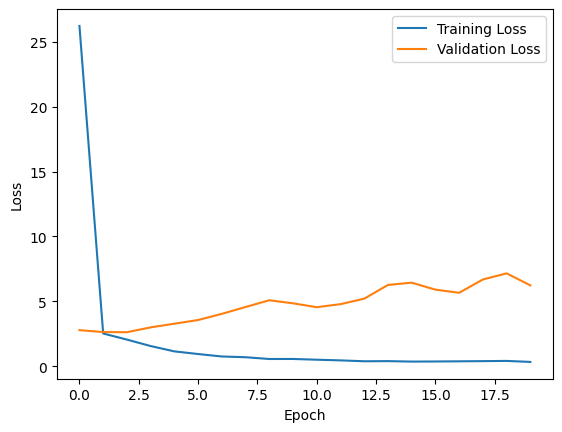

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)


import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Gather all predictions and true labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.concatenate([np.argmax(model.predict(x), axis=1) for x, y in test_ds], axis=0)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=test_ds.class_names))



12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.2518 - loss: 6.9610
Test Accuracy: 0.24802111089229584


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Confusion Matrix:
 [[0 1 0 1 2 0 2 3 1 2 3 2 0 0 0 1 2]
 [0 0 2 1 1 0 4 2 1 1 0 3 0 0 1 2 2]
 [0 1 0 1 2 4 2 2 0 2 1 2 0 2 0 1 0]
 [0 2 0 2 3 1 0 1 3 2 1 3 0 0 0 1 1]
 [1 0 2 3 2 2 0 2 3 0 2 2 0 0 0 2 1]
 [0 1 0 1 2 3 1 0 2 5 0 1 1 1 1 1 0]
 [0 0 2 1 8 1 0 1 1 4 2 3 1 0 0 0 0]
 [0 0 2 0 2 3 2 2 2 3 0 2 0 0 0 2 1]
 [0 0 1 0 6 0 3 1 1 3 2 0 1 2 1 0 3]
 [0 2 0 3 2 3 1 1 1 5 0 1 0 1 2 0 2]
 [0 0 2 0 4 2 1 2 3 4 1 2 0 1 1 1 0]
 [1 0 2 1 2 0 3 4 0 6 2 2 0 1 0 0 0]
 [0 0 1 3 3 1 3 2 2 1 1 2 0 2 0 2 1]
 [0 1 2 3 5 2 3 2 1 1 0 1 0 0 1 0 2]
 [0 1 

In [49]:
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\train"
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
train_raw = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\val"
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\test"
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
test_raw = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))



# Normalize pixel values from [0,255] → [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 6443 files belonging to 17 classes.
Found 6443 files belonging to 17 classes.
Found 413 files belonging to 17 classes.
Found 379 files belonging to 17 classes.
Found 379 files belonging to 17 classes.


In [ ]:
model2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

model2.compile(
    optimizer='adam',                         # we’ll discuss this choice later for your report
    loss='sparse_categorical_crossentropy',   # since labels are integer IDs
    metrics=['accuracy']
)


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
history = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 56s 196ms/step - accuracy: 0.0858 - loss: 2.7971 - val_accuracy: 0.3027 - val_loss: 2.5370
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 49s 244ms/step - accuracy: 0.1781 - loss: 2.5602 - val_accuracy: 0.3850 - val_loss: 2.2065
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 41s 202ms/step - accuracy: 0.2454 - loss: 2.3186 - val_accuracy: 0.4431 - val_loss: 2.0355
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - accuracy: 0.2875 - loss: 2.1820 - val_accuracy: 0.4649 - val_loss: 1.9711
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 46s 228ms/step - accuracy: 0.3133 - loss: 2.0700 - val_accuracy: 0.4504 - val_loss: 1.9649
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 44s 218ms/step - accuracy: 0.3524 - loss: 1.9468 - val_accuracy: 0.4843 - val_loss: 1.8214
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 43s 214ms/step - accuracy: 0.3719 - loss: 1.8422 - val_accuracy: 0.4964 - val_loss: 1.7393
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 39s 195ms/step - accuracy: 0.3806 - loss: 1

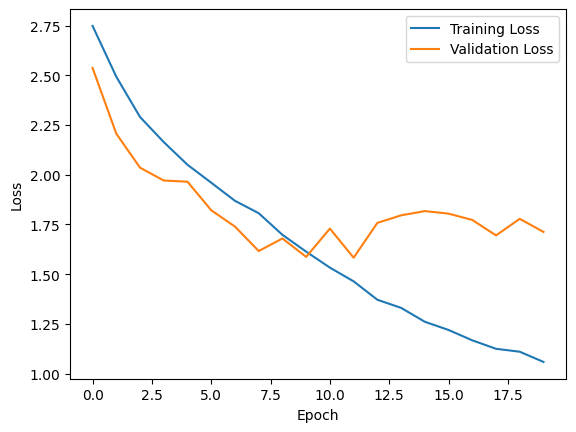

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.0949 - loss: 4.1170
Test Accuracy: 0.09498680382966995
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Confusion Matrix:
 [[ 0  4  3  0  5  0  4  0  0  0  0  4  0  0  0  0  0]
 [ 0  6  3  0  9  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  3  0  6  0  2  1  0  0  0  4  0  0  0  0  0]
 [ 0  6  1  0  4  0  8  0  0  0  0  1  0  0  0  0  0]
 [ 0  8  2  0  8  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  7  0  0  7  0  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  4  0  4  2  8  0  0  0  0  2  0  1  0  0  0]
 [ 0  1  0  0  3  0 17  0  0  0  0  0

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)


import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Gather all predictions and true labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.concatenate([np.argmax(model.predict(x), axis=1) for x, y in test_ds], axis=0)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=test_raw.class_names))



In [5]:
import tensorflow as tf, gc
tf.keras.backend.clear_session()
gc.collect()


0

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\train"
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(224,224) ,# keep small for now
    batch_size=16
)
train_raw = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(224,224),  # keep small for now
    batch_size=16
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\val"
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(224,224),  # keep small for now
    batch_size=16
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\test"
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(224,224),  # keep small for now
    batch_size=16
)
test_raw = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(224,224),  # keep small for now
    batch_size=16
)

data_augmentation = keras.Sequential([
    layers.RandomFlip(),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))



# Normalize pixel values from [0,255] → [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 6443 files belonging to 17 classes.
Found 6443 files belonging to 17 classes.
Found 413 files belonging to 17 classes.
Found 379 files belonging to 17 classes.
Found 379 files belonging to 17 classes.


In [3]:
from tensorflow.keras import layers, models

num_classes= 17
model2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1)

history = model2.fit(train_ds, validation_data=val_ds, epochs=14, callbacks=[early_stop, reduce_lr])




Epoch 1/14


403/403 ━━━━━━━━━━━━━━━━━━━━ 228s 566ms/step - accuracy: 0.6103 - loss: 1.1920 - val_accuracy: 0.4116 - val_loss: 2.5845 - learning_rate: 0.0010
Epoch 2/14
403/403 ━━━━━━━━━━━━━━━━━━━━ 253s 628ms/step - accuracy: 0.6506 - loss: 1.0818 - val_accuracy: 0.4697 - val_loss: 2.3855 - learning_rate: 0.0010
Epoch 3/14
403/403 ━━━━━━━━━━━━━━━━━━━━ 253s 628ms/step - accuracy: 0.6689 - loss: 1.0325 - val_accuracy: 0.3559 - val_loss: 2.8290 - learning_rate: 0.0010
Epoch 4/14
403/403 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.6936 - loss: 0.9467
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
403/403 ━━━━━━━━━━━━━━━━━━━━ 251s 624ms/step - accuracy: 0.6936 - loss: 0.9468 - val_accuracy: 0.4576 - val_loss: 2.4826 - learning_rate: 0.0010
Epoch 5/14
403/403 ━━━━━━━━━━━━━━━━━━━━ 259s 644ms/step - accuracy: 0.7497 - loss: 0.7965 - val_accuracy: 0.5545 - val_loss: 2.1323 - learning_rate: 3.0000e-04
Epoch 6/14
403/403 ━━━━━━━━━━━━━━━━━━━━ 249s 619ms/step - accuracy: 0.7765

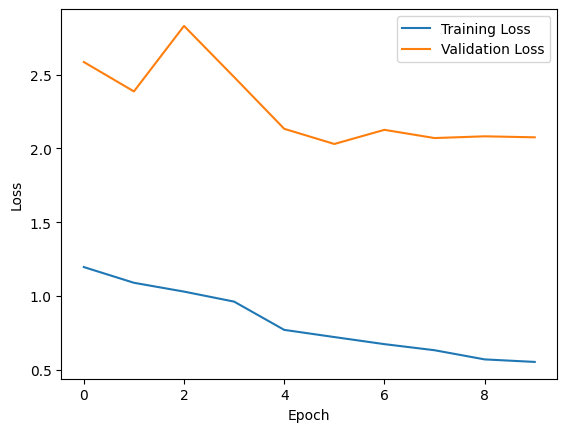

24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 311ms/step - accuracy: 0.7440 - loss: 0.9543
Test Accuracy: 0.7414247989654541
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163m

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_acc = model2.evaluate(test_ds)
print("Test Accuracy:", test_acc)


import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Gather all predictions and true labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.concatenate([np.argmax(model2.predict(x), axis=1) for x, y in test_ds], axis=0)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=test_raw.class_names))



In [7]:
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=test_raw.class_names))


Confusion Matrix:
 [[ 4  0  0  3  4  0  1  0  0  3  0  2  2  0  0  1  0]
 [ 0 15  0  4  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  7  2  0  0  0  0  0  7  0  2  0  1  0  0  0]
 [ 0  0  0 19  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  3]
 [ 1  0  2  1  1 11  0  1  0  1  1  0  0  0  0  1  0]
 [ 0  0  0  2  2  1 15  0  0  0  0  2  0  1  0  0  1]
 [ 0  0  0  1  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0]
 [ 1  0  0  6  1  1  0  0  0 14  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0]
 [ 0  0  0  2  6  0  3  0  0  0  0 11  0  1  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  8  0 14  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2 18  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  6 18  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 24]]

Classification Report:
                                precis

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 237ms/step


C:\Users\User\AppData\Local\Temp\ipykernel_17732\567674841.py:44: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_17732\567674841.py:44: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


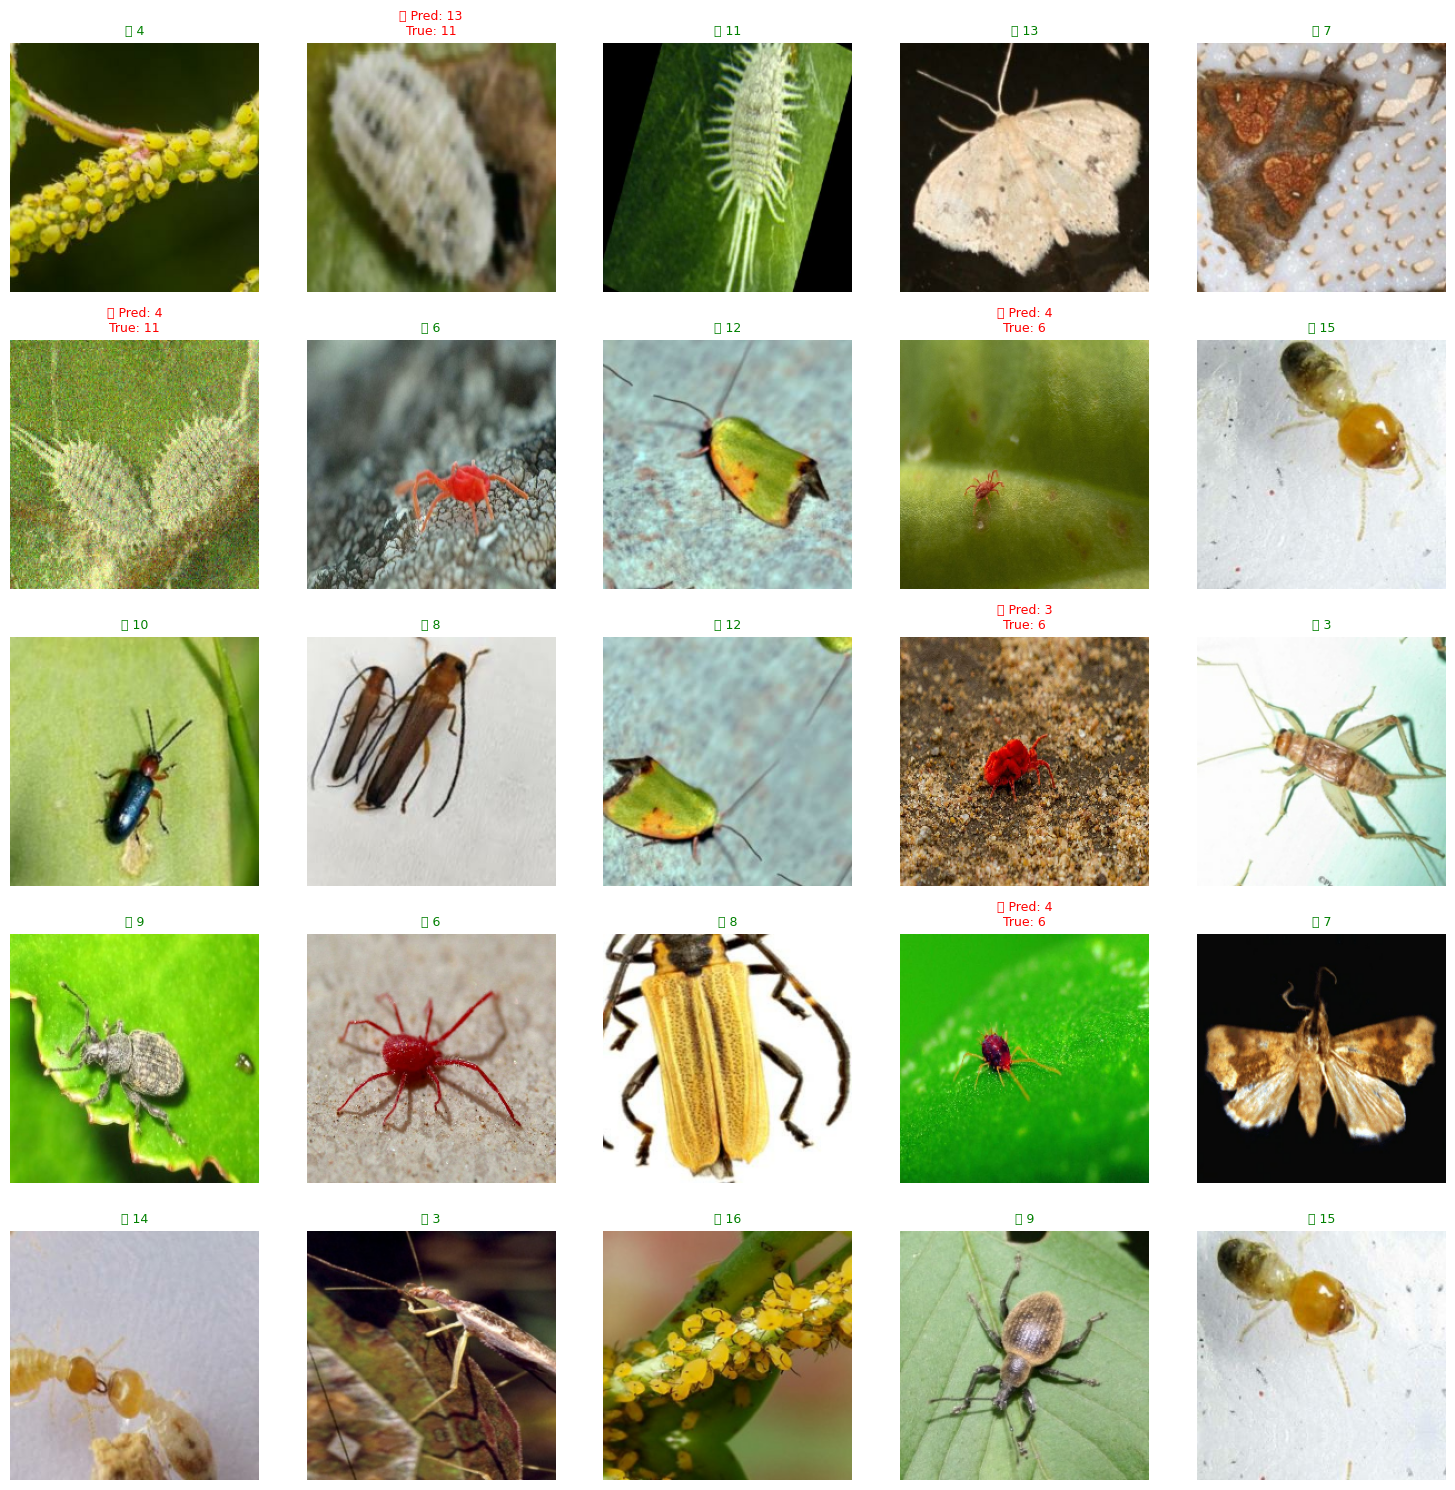

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Assuming you already have test_ds and model2

# Get class names (if dataset has .class_names)
class_names = test_ds.class_names if hasattr(test_ds, 'class_names') else [str(i) for i in range(model2.output_shape[-1])]

# Collect all images and labels from test_ds
images = []
labels = []
for x, y in test_ds:
    images.append(x.numpy())
    labels.append(y.numpy())
images = np.concatenate(images)
labels = np.concatenate(labels)

# Make predictions
pred_probs = model2.predict(images)
preds = np.argmax(pred_probs, axis=1)

# Plot a few samples
num_images_to_show = 25  # change this to show more or less
plt.figure(figsize=(15, 15))

for i in range(num_images_to_show):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    
    true_label = class_names[labels[i]]
    pred_label = class_names[preds[i]]
    
    if preds[i] == labels[i]:
        color = "green"
        title = f"✅ {pred_label}"
    else:
        color = "red"
        title = f"❌ Pred: {pred_label}\nTrue: {true_label}"
    
    plt.title(title, color=color, fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()
